In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("C:/Users/Muhammad Fahri Hamdi/OneDrive/Documents/Semester 3/Pratikum Data Mining dan Warehouse/P12/P12/Mall_Customers (1).csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = dataset.iloc[:, 3:5]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
X.shape

(200, 2)

In [7]:
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


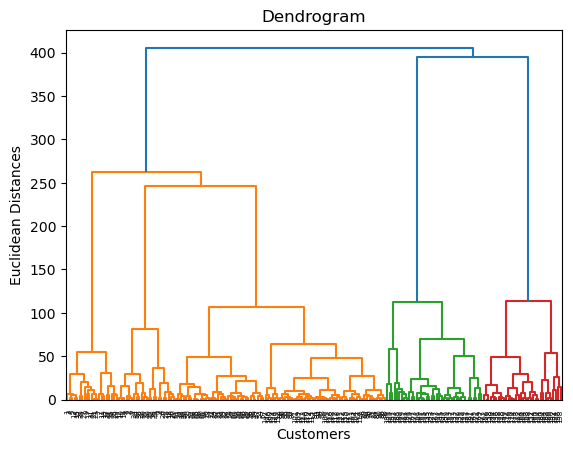

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
ac.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [11]:
ac.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [12]:
hasil_ac = X.copy()
hasil_ac["cluster"] = ac.labels_
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


Text(0, 0.5, 'Frekuensi')

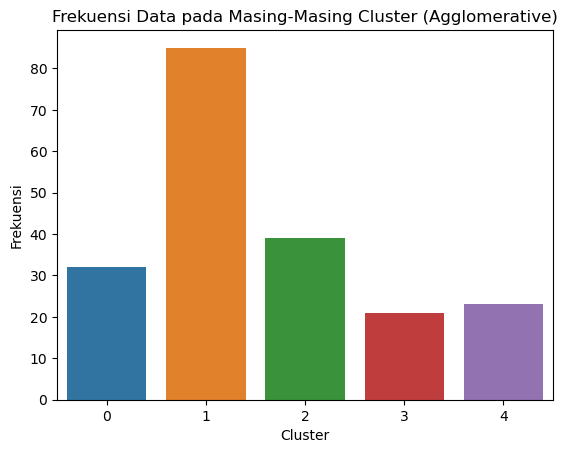

In [13]:
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values
sns.barplot(x = cluster_x1, y = cluster_y1)
plt.title("Frekuensi Data pada Masing-Masing Cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

In [14]:
ann_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 0]
spend_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 1]
ann_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 0]
spend_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 1]
ann_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 0]
spend_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 1]
ann_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 0]
spend_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 1]
ann_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 0]
spend_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 1]

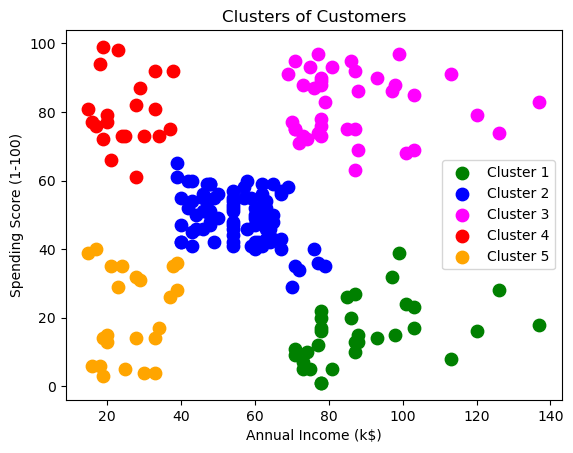

In [15]:
plt.scatter(ann_ac0, spend_ac0, s = 80, c = "green", label = "Cluster 1")
plt.scatter(ann_ac1, spend_ac1, s = 80, c = "blue", label = "Cluster 2")
plt.scatter(ann_ac2, spend_ac2, s = 80, c = "magenta", label = "Cluster 3")
plt.scatter(ann_ac3, spend_ac3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(ann_ac4, spend_ac4, s = 80, c = "orange", label = "Cluster 5")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [34]:
hasil_ac.drop(columns=["CustomerID"], inplace=True)
hasil_ac.insert(3, "CustomerID", dataset["CustomerID"])

hasil_ac

,Annual Income (k$),Spending Score (1-100),cluster,CustomerID
0,15,39,4,1
1,15,81,3,2
2,16,6,4,3
3,16,77,3,4
4,17,40,4,5
...,...,...,...,...
195,120,79,2,196
196,126,28,0,197
197,126,74,2,198
198,137,18,0,199


In [ ]:
hasil_clustering.to_csv("hasil_clustering.csv", index=False)